# Data Visualiztion Course Final Projet
> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>


<br>

# Jupyter Notebook Number 2
<i>Dimensionality Reduction and PCA for Fashion MNIST</i>

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [2]:
# import data:

# test data
mnist_test = pd.read_csv("data/task_2/fashion-mnist_test.csv")
mnist_test = mnist_test.dropna()
X_test = mnist_test.iloc[:, 1:]
y_test = mnist_test.iloc[:, :1]

# trains data
mnist_train = pd.read_csv("data/task_2/fashion-mnist_train.csv")
mnist_train = mnist_train.dropna()
X_train = mnist_train.iloc[:, 1:]
y_train = mnist_train.iloc[:, :1]

# prints the data shape
print("shape of the test data is: ", mnist_test.shape)
print("shape of the train data is:", mnist_train.shape)

shape of the test data is:  (10000, 785)
shape of the train data is: (60000, 785)


In [3]:
# first five test mnist:
# we can see that each row has 785 features
mnist_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# first five train mnist:
# we can see that each row has 785 features
mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# seeing the mnist data widely
# we can see we have 10000 rows
mnist_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


# <i>2 Component PCA:</i>

In [6]:
pca_two_components = PCA(n_components=2)
X_transformed_two = pca_two_components.fit(X_test).transform(X_test)
print("shape of 2 component PCA test data is:", X_transformed_two.shape)

shape of 2 component PCA test data is: (10000, 2)


## Variance Ratio:

In [7]:
pca_two_components.explained_variance_ratio_

array([0.2902809 , 0.17902619])

### Visualize the result of applying PCA to our datasets, plot how much weight each pixel in the clothing picture gets in the resulting vector, using a heatmap.

* This creates a nice, potentially interpretable picture of what each vector is "finding".

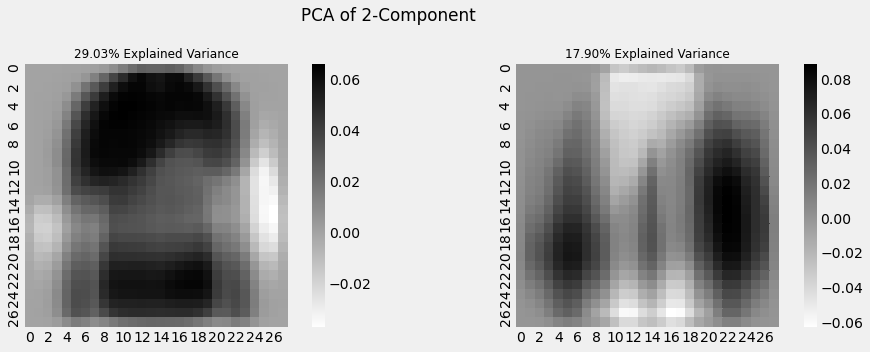

In [8]:
# use fivethirtyeight style for ploting
plt.style.use('fivethirtyeight')

# create a figure
fig, axarr = plt.subplots(1, 2, figsize=(14, 5))

# create heatmaps for visualize the data
sns.heatmap(pca_two_components.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca_two_components.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')

axarr[0].set_title("{0:.2f}% Explained Variance".format(pca_two_components.explained_variance_ratio_[0]*100), fontsize=12)
axarr[1].set_title("{0:.2f}% Explained Variance".format(pca_two_components.explained_variance_ratio_[1]*100), fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

# create a common title
plt.suptitle('PCA of 2-Component')

# plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance of 2 Components PCA')

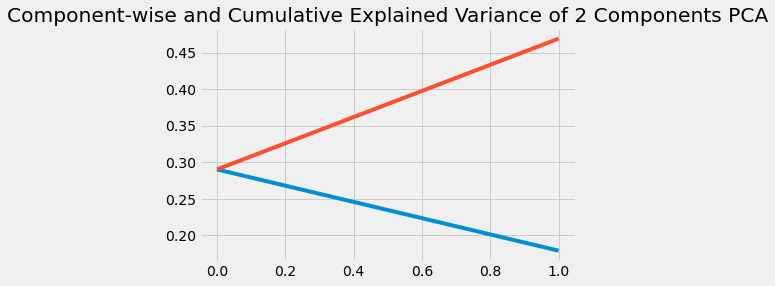

In [9]:
plt.plot(range(2), pca_two_components.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca_two_components.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance of 2 Components PCA")

# <i>4 Component PCA:</i>

In [10]:
pca_four_components = PCA(n_components=4)
X_transformed_four = pca_four_components.fit(X_test).transform(X_test)
print("shape of 4 component PCA test data is:", X_transformed_four.shape)

shape of 4 component PCA test data is: (10000, 4)


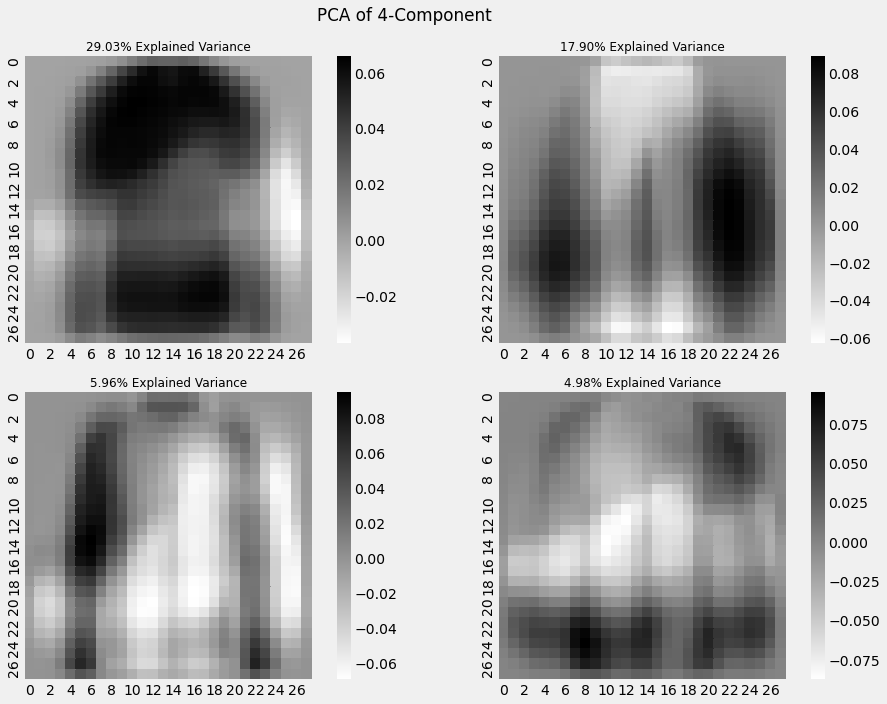

In [11]:
# use fivethirtyeight style for ploting
plt.style.use('fivethirtyeight')

# create a figure
fig, axarr = plt.subplots(2, 2, figsize=(14, 10))

# create heatmaps for visualize the data
sns.heatmap(pca_four_components.components_[0, :].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca_four_components.components_[1, :].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca_four_components.components_[2, :].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca_four_components.components_[3, :].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')

# set titles for the 4 heatmaps
axarr[0][0].set_title(
    "{0:.2f}% Explained Variance".format(pca_four_components.explained_variance_ratio_[0]*100),
    fontsize=12)

axarr[0][1].set_title(
    "{0:.2f}% Explained Variance".format(pca_four_components.explained_variance_ratio_[1]*100),
    fontsize=12)

axarr[1][0].set_title(
    "{0:.2f}% Explained Variance".format(pca_four_components.explained_variance_ratio_[2]*100),
    fontsize=12)

axarr[1][1].set_title(
    "{0:.2f}% Explained Variance".format(pca_four_components.explained_variance_ratio_[3]*100),
    fontsize=12)

axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

# create a common title
plt.suptitle('PCA of 4-Component')

# plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance of 4 Components PCA')

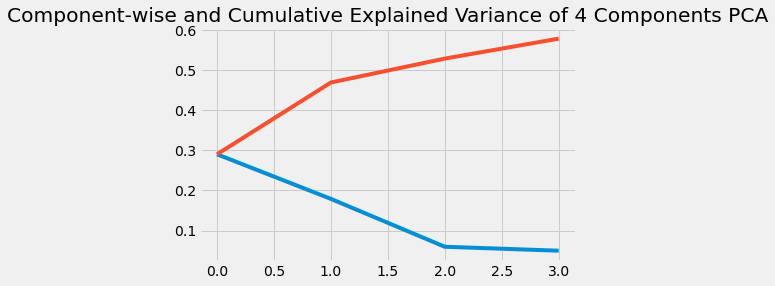

In [12]:
plt.plot(range(4), pca_four_components.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca_four_components.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance of 4 Components PCA")

# <i>10 Component PCA:</i>

In [14]:
pca_ten_components = PCA(n_components=10)
X_transformed_ten = pca_ten_components.fit(X_test).transform(X_test)
print("shape of 10 component PCA test data is:", X_transformed_ten.shape)

shape of 10 component PCA test data is: (10000, 10)


Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance of 10 Components PCA')

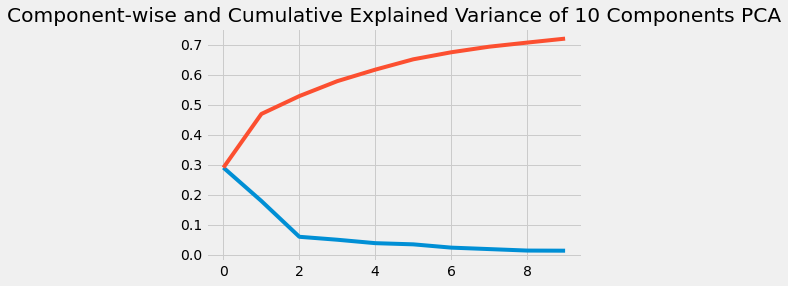

In [15]:

plt.plot(range(10), pca_ten_components.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca_ten_components.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance of 10 Components PCA")

In [16]:
X_norm = normalize(X_test.values)
# X_norm = X.values / 255

pca_onehundredandtwenty_components = PCA(n_components=120)
X_norm_r = pca_onehundredandtwenty_components.fit(X_norm).transform(X_norm)

<AxesSubplot:>

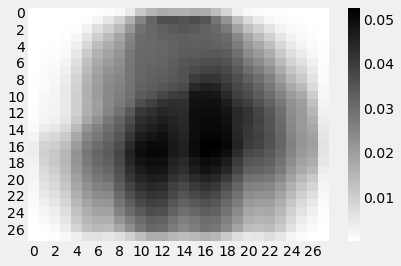

In [17]:
sns.heatmap(pd.DataFrame(X_norm).mean().values.reshape(28, 28), cmap='gray_r')

<AxesSubplot:>

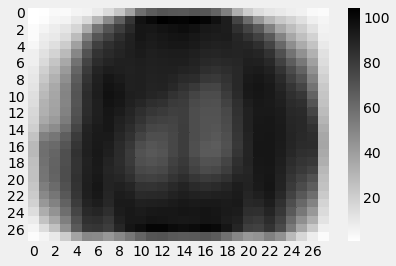

In [18]:
sns.heatmap(pd.DataFrame(X_test).std().values.reshape(28, 28), cmap='gray_r')
